In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

c:\Users\99bis\OneDrive\python\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\99bis\OneDrive\python\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
cars_data = pd.read_csv(r"C:\Users\99bis\Used Car Price prediction ML\Dataset\Cardetails.csv")

In [3]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [4]:
cars_data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [5]:
cars_data = cars_data.rename(columns = {'mileage(km/ltr/kg)' : 'mileage'})

In [6]:
cars_data.shape

(8128, 12)

In [7]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


In [8]:
cars_data.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

We can handle null values by 2 methods-
first one is replace the NaN value by mean of the column and 
second is remove the rows which have NaN value

In [9]:
nan_rows_mil = cars_data[cars_data['mileage'].isna()]

print(nan_rows_mil)

                                      name  year  selling_price  km_driven  \
13                    Maruti Swift 1.3 VXi  2007         200000      80000   
31                      Fiat Palio 1.2 ELX  2003          70000      50000   
78                         Tata Indica DLS  2003          50000      70000   
87             Maruti Swift VDI BSIV W ABS  2015         475000      78000   
119                  Maruti Swift VDI BSIV  2010         300000     120000   
...                                    ...   ...            ...        ...   
7846                Toyota Qualis Fleet A3  2000         200000     100000   
7996             Hyundai Santro LS zipPlus  2000         140000      50000   
8009  Hyundai Santro Xing XS eRLX Euro III  2006         145000      80000   
8068             Ford Figo Aspire Facelift  2017         580000     165000   
8103                  Maruti Swift 1.3 VXi  2006         130000     100000   

        fuel seller_type transmission         owner mileage eng

Here we can see that when i checked NaN columns for 'Mileage' in that respective row other other column values such that 'engine','max_power','seats' are also NaN.

In [10]:
#percentage of missing values
cars_data.isna().mean().round(4) * 100

name             0.00
year             0.00
selling_price    0.00
km_driven        0.00
fuel             0.00
seller_type      0.00
transmission     0.00
owner            0.00
mileage          2.72
engine           2.72
max_power        2.65
seats            2.72
dtype: float64


In my opinion this rows are not providing much information about the dataset and 221 rows corresponds to less than 5% to the total data of my whole data so it's better to remove them.

In [11]:
cars_data.dropna(inplace = True)  #it will remove the rows which have NaN values

In [12]:
cars_data.shape   #shape of the data after removing NaN values

(7907, 12)

In [13]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7907 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7907 non-null   object 
 1   year           7907 non-null   int64  
 2   selling_price  7907 non-null   int64  
 3   km_driven      7907 non-null   int64  
 4   fuel           7907 non-null   object 
 5   seller_type    7907 non-null   object 
 6   transmission   7907 non-null   object 
 7   owner          7907 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7907 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 803.1+ KB


As we can see no NaN values are here

Now we'll check is there any duplicate record present in our dataset or not

In [14]:
cars_data.duplicated().sum()

1189

In [15]:
duplicates = cars_data[cars_data.duplicated()]

In [16]:
duplicates

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
291,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,5.0
296,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,5.0
370,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,5.0
371,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,5.0
372,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7987,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,5.0
7988,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,5.0
8117,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


This are the identical rows present in my dataset

we have the drop the duplicates for better performamce of the model

In [17]:
cars_data.drop_duplicates(inplace=True)

In [18]:
cars_data.shape

(6718, 12)

In [19]:
cars_data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [20]:
for col in cars_data.columns:
    print("Unique values of" + col)
    print(cars_data[col].unique)
    print('------------\n')

Unique values ofname
<bound method Series.unique of 0                  Maruti Swift Dzire VDI
1            Skoda Rapid 1.5 TDI Ambition
2                Honda City 2017-2020 EXi
3               Hyundai i20 Sportz Diesel
4                  Maruti Swift VXI BSIII
                      ...                
8121    Maruti Wagon R VXI BS IV with ABS
8122           Hyundai i20 Magna 1.4 CRDi
8123                    Hyundai i20 Magna
8124                Hyundai Verna CRDi SX
8125               Maruti Swift Dzire ZDi
Name: name, Length: 6718, dtype: object>
------------

Unique values ofyear
<bound method Series.unique of 0       2014
1       2014
2       2006
3       2010
4       2007
        ... 
8121    2013
8122    2014
8123    2013
8124    2007
8125    2009
Name: year, Length: 6718, dtype: int64>
------------

Unique values ofselling_price
<bound method Series.unique of 0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8121    260000
8122    475000
8

In [21]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.3+ KB


## Isuues i can see in my datsset
- name is very large, so we'll just keep the brand name of the car and impoertant numerical value of torque rather than whole data
- Fuel column is in object but should be in integer
- milegae column has both alphabetical and numerical column but should be in numerical only
- we have to change the categorical values into numerical values by encoding for engine,max power column also

In [22]:
#Creating a function for getting only the first word 

In [23]:
def get_brand_name(car_name):
    car_name = car_name.split()[0]
    return car_name.strip(' ')

In [24]:
get_brand_name('Maruti Swift Dzire VDI')

'Maruti'

In [25]:
#updating the name column with just the Brand of the car
cars_data['name'] = cars_data['name'].apply(get_brand_name)

In [26]:
cars_data['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [27]:
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0
8122,Hyundai,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0


In [28]:
cars_data['mileage'] = cars_data['mileage'].apply(get_brand_name)  #for mileage column only keeping numerical values

In [29]:
cars_data['engine'] = cars_data['engine'].apply(get_brand_name) #for engine

In [30]:
cars_data['max_power'] = cars_data['max_power'].apply(get_brand_name) #for max power column

In [31]:
cars_data['max_power'].unique()

array(['74', '103.52', '78', '90', '88.2', '81.86', '57.5', '37', '67.1',
       '68.1', '108.45', '60', '73.9', '67', '82', '88.5', '46.3',
       '88.73', '64.1', '98.6', '88.8', '83.81', '83.1', '47.3', '73.8',
       '34.2', '35', '81.83', '40.3', '121.3', '138.03', '160.77',
       '117.3', '116.3', '83.14', '67.05', '168.5', '100', '120.7',
       '98.63', '175.56', '103.25', '171.5', '100.6', '174.33', '187.74',
       '170', '78.9', '88.76', '86.8', '108.495', '108.62', '93.7',
       '103.6', '98.59', '189', '67.04', '68.05', '58.2', '82.85',
       '81.80', '73', '120', '94.68', '160', '65', '155', '69.01',
       '126.32', '138.1', '83.8', '126.2', '98.96', '62.1', '86.7', '188',
       '214.56', '177', '280', '148.31', '254.79', '190', '177.46', '204',
       '141', '117.6', '241.4', '282', '150', '147.5', '108.5', '103.5',
       '183', '181.04', '157.7', '164.7', '91.1', '400', '68', '75',
       '85.8', '87.2', '53', '118', '103.2', '83', '84', '58.16',
       '147.94', 

In [32]:
cars_data['max_power'].value_counts()['bhp']   #how many time bhp occured in the dataset

1

In [33]:
cars_data = cars_data[cars_data['max_power'] != 'bhp']   #removing that row which has 'bhp'

In [34]:
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9,998,67.1,5.0
8122,Hyundai,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5.0
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5,1197,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493,110,5.0


In [35]:
# some of the columns are still in object form we have to convert then into interger or float
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   object 
 10  max_power      6717 non-null   object 
 11  seats          6717 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.2+ KB


In [36]:
cars_data['mileage'] = cars_data['mileage'].astype('float')   #converting mileage into float

In [37]:
cars_data['engine'] = cars_data['engine'].astype('int')       #converting engine into integer

In [38]:
cars_data['max_power'] = cars_data['max_power'].astype('float')   #converting max power into float

In [39]:
cars_data['seats'] = cars_data['seats'].astype(int)        #converting seats intto integer

In [40]:
cars_data.reset_index()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5
3,3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
4,4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,8121,Maruti,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5
6713,8122,Hyundai,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5
6714,8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
6715,8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5


In [41]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   int32  
 10  max_power      6717 non-null   float64
 11  seats          6717 non-null   int32  
dtypes: float64(2), int32(2), int64(3), object(5)
memory usage: 629.7+ KB


In [42]:
cars_data.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,6717.000000,6.717000e+03,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000
mean,2013.611136,5.263860e+05,7.339834e+04,19.466585,1430.985857,87.766100,5.434271
std,3.897402,5.235504e+05,5.870328e+04,4.048102,493.469198,31.724555,0.983805
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,16.800000,1197.000000,67.100000,5.000000
50%,2014.000000,4.200000e+05,6.820300e+04,19.440000,1248.000000,81.830000,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,22.500000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


Here we can see that the 75% of our cars price is under 6.5 lakh and maximum value in the last quartile is showing max price as  1 cr , that may be a outlier which we have to check.
Now lets check how many cars are there which have more than 50 lakhs of price.

In [43]:
#car price which are more than 50 lakhs

cars_data[cars_data['selling_price']>5e6]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
132,Lexus,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37,2487,214.56,5
136,Mercedes-Benz,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.50,2987,254.79,5
139,BMW,2019,5800000,7500,Diesel,Dealer,Automatic,First Owner,16.78,1995,190.00,5
148,Mercedes-Benz,2017,5850000,47000,Diesel,Dealer,Automatic,First Owner,13.50,2987,282.00,5
170,Volvo,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.00,1969,400.00,4
384,BMW,2019,5400000,7500,Diesel,Dealer,Automatic,First Owner,16.78,1995,190.00,5
385,BMW,2019,5500000,8500,Diesel,Dealer,Automatic,First Owner,16.78,1995,190.00,5
1071,BMW,2018,6000000,28156,Diesel,Dealer,Automatic,First Owner,17.09,2993,261.40,4
2938,BMW,2020,7200000,5000,Diesel,Individual,Automatic,First Owner,13.38,2993,265.00,7
4671,BMW,2019,5200000,10000,Diesel,Dealer,Automatic,First Owner,18.12,1995,190.00,5


Looks fine because they are luxury brands only.

In [44]:
# now for mileage column which have more than 30.00 kmpl or more mileage

In [45]:
cars_data[cars_data['mileage']>30.00]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
35,Maruti,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44,796,40.30,4
170,Volvo,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.00,1969,400.00,4
866,Maruti,2012,165000,60000,CNG,Individual,Manual,Second Owner,30.46,796,47.30,5
2312,Maruti,2013,270000,80000,CNG,Individual,Manual,Second Owner,32.52,998,58.33,5
3908,Maruti,2017,260000,67000,CNG,Individual,Manual,First Owner,33.44,796,40.30,4
4004,Maruti,2013,178000,70000,CNG,Individual,Manual,Second Owner,30.46,796,47.30,5
5789,Maruti,2019,430000,20000,CNG,Individual,Manual,First Owner,32.26,998,58.30,4
5815,Maruti,2020,370000,16000,CNG,Individual,Manual,First Owner,33.00,796,47.30,5


from the domain knowledge we can say that row 170 which is a Volvo car which is showing mileage of 42kmpl for automaticating transmission and with petrol fuel, which seems not right this is an outlier which i i'm going to drop.

In [46]:
cars_data = cars_data[cars_data['mileage']!= 42.00]   #removing that Volvo car

In [47]:
cars_data[cars_data['mileage']>30.00]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
35,Maruti,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44,796,40.30,4
866,Maruti,2012,165000,60000,CNG,Individual,Manual,Second Owner,30.46,796,47.30,5
2312,Maruti,2013,270000,80000,CNG,Individual,Manual,Second Owner,32.52,998,58.33,5
3908,Maruti,2017,260000,67000,CNG,Individual,Manual,First Owner,33.44,796,40.30,4
4004,Maruti,2013,178000,70000,CNG,Individual,Manual,Second Owner,30.46,796,47.30,5
5789,Maruti,2019,430000,20000,CNG,Individual,Manual,First Owner,32.26,998,58.30,4
5815,Maruti,2020,370000,16000,CNG,Individual,Manual,First Owner,33.00,796,47.30,5


That specific Volve car is removed

In [48]:
cars_data.reset_index()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5
3,3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
4,4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,8121,Maruti,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5
6712,8122,Hyundai,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5
6713,8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
6714,8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5


In [49]:
cars_data_cleaned = cars_data.copy()
cars_data_cleaned

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5
8122,Hyundai,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5


### Data is cleaned

## Now step 2 - Data Vizualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


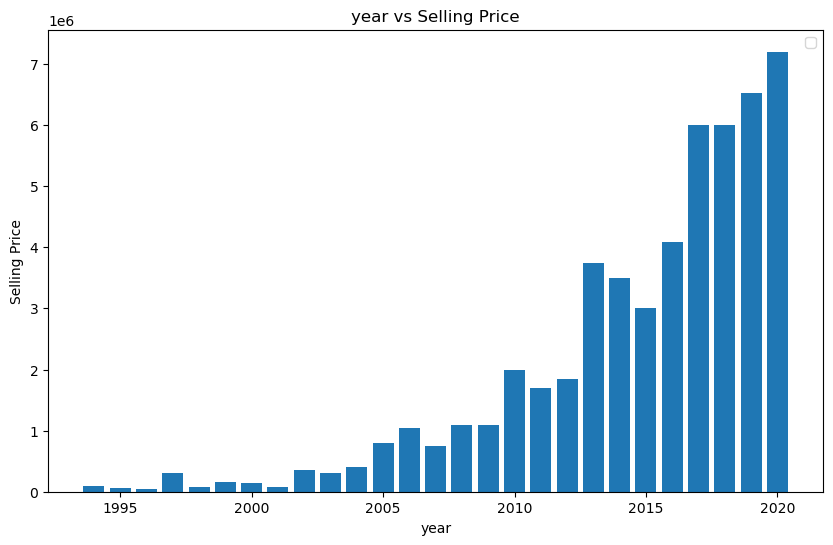

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


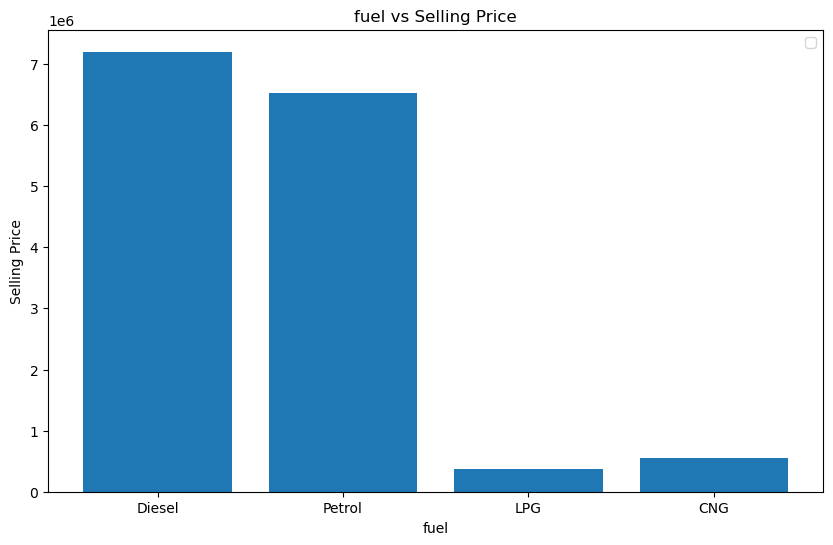

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


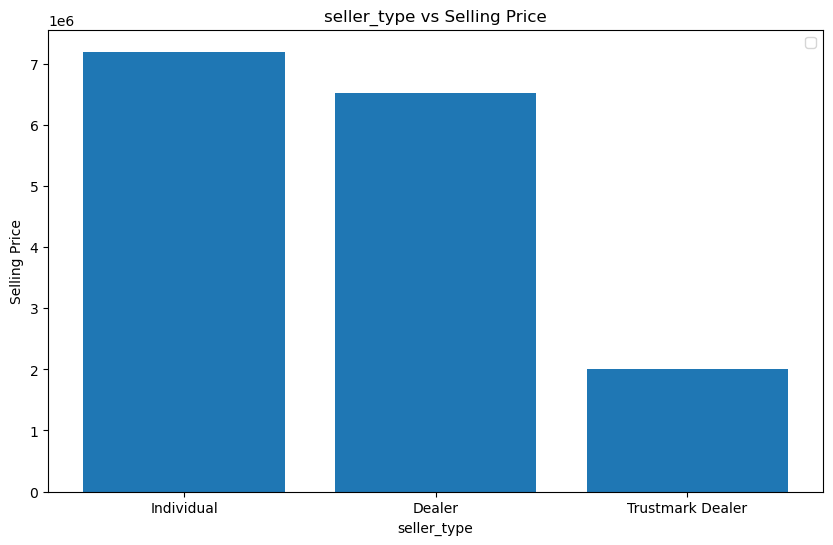

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


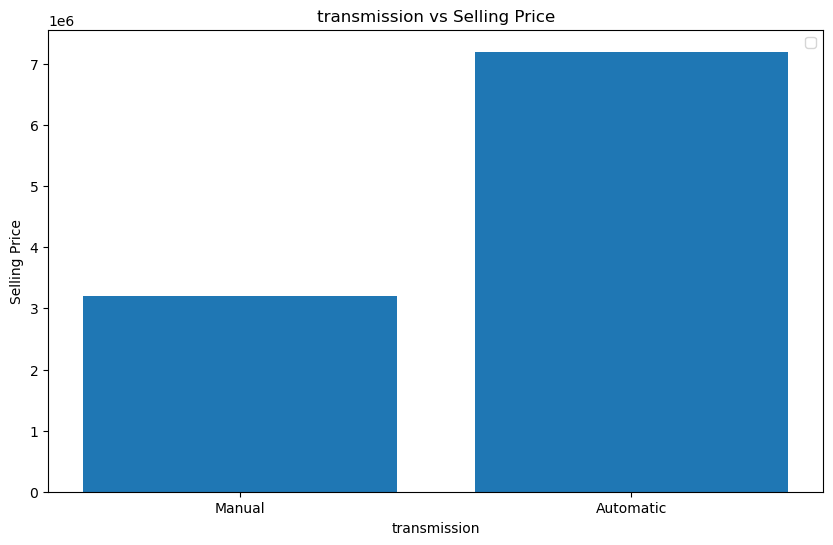

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


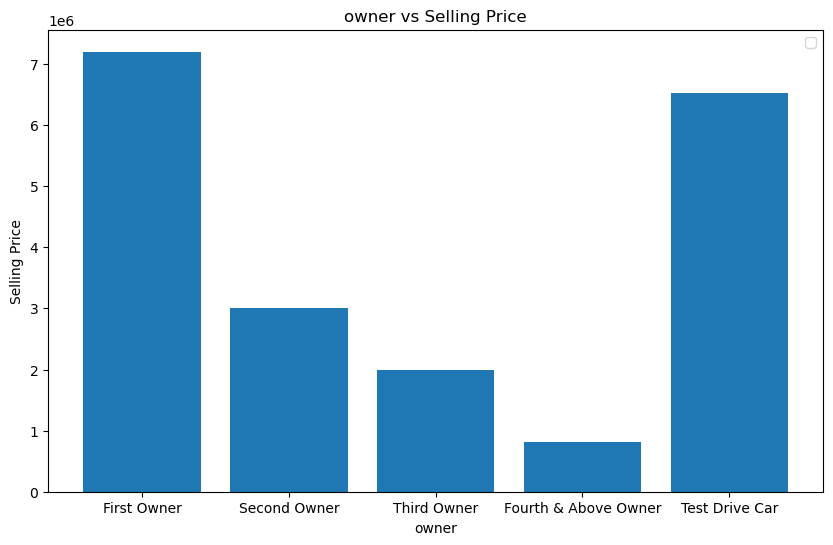

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


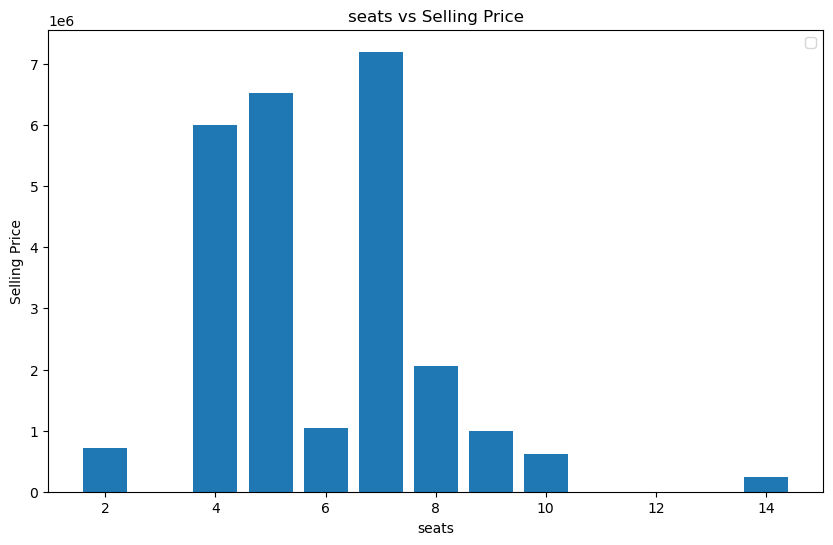

In [50]:
cols = ['year','fuel','seller_type','transmission','owner','seats']
for c in cols:
    plt.figure(figsize=(10,6))
    plt.bar(x=f'{c}',height='selling_price',data=cars_data)
    plt.xlabel(f'{c}')
    plt.ylabel('Selling Price')
    plt.title(f'{c} vs Selling Price')
    plt.legend()
    plt.show()

### Observations - 
- Fig 1 
    - Average selling price in 2017 is highest.

- Fig 2 
    - Average selling price of Diesel cars is higher than Petrol .CNG and LPG cars have very less selling price.
    
- Fig 3
    - Average selling price of Individual cars is higher followed by Dealer and Trustmark Dealer
    
- Fig 4
    - Automaticatic cars tend to have more selling price than manual cars.

- Fig 5
    - 'First owner' cars have highest selling price surprisingly follwed by 'Test drive car'. Second,third and fourth and above           owner cars has lower selling price.
    
- Fig 6
     - 4 seater car has highest selling price followed by 7 seater and 5 seater cars.Other cars has lower selling selling price.

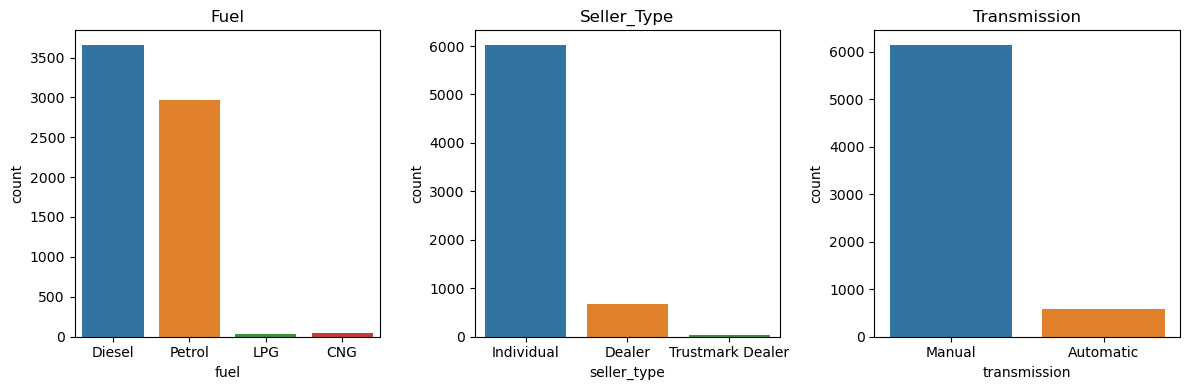

In [51]:
plt.figure(figsize=(12, 4))

# Fuel
plt.subplot(1, 3, 1)
sns.countplot(data=cars_data, x='fuel')
plt.title('Fuel')

# Seller_Type
plt.subplot(1, 3, 2)
sns.countplot(data=cars_data, x='seller_type')
plt.title('Seller_Type')

# Transmission
plt.subplot(1, 3, 3)
sns.countplot(data=cars_data, x='transmission')
plt.title('Transmission')

plt.tight_layout()
plt.show()

#### fig 1
 - In fuel type diesel cars are more than petrol cars and LPG and CNG are very low in number

#### fig 2
- individual cars highest in numbers as compared to Dealer and Trustmark Dealer

#### fig 3
- There are more numbers of manual cars in our dataset then automatic cars


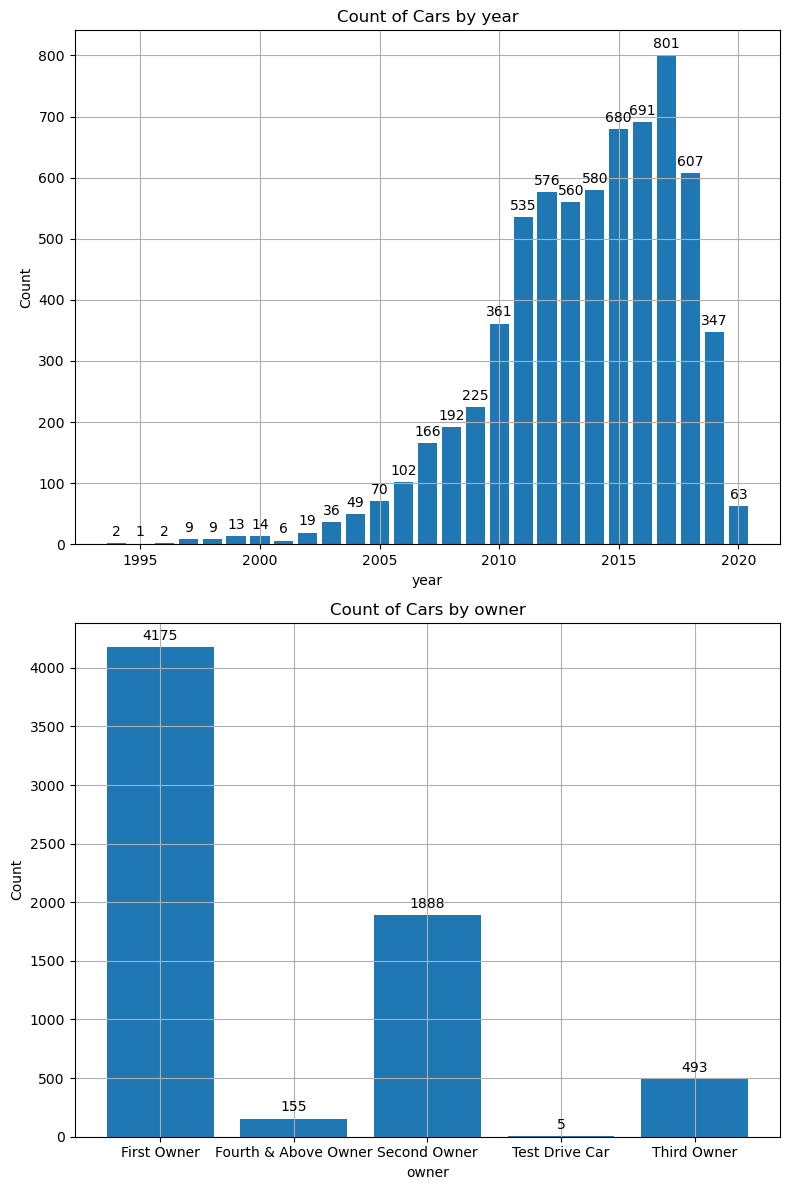

In [52]:
import matplotlib.pyplot as plt

columns = ['year', 'owner']

fig, axs = plt.subplots(len(columns), 1, figsize=(8, 6*len(columns)))

for i, col in enumerate(columns):     #for ploting each column
    # Counting occurrences of each category
    col_counts = cars_data[col].value_counts().sort_index()

    bars = axs[i].bar(col_counts.index, col_counts.values)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Count of Cars by {col}')
    axs[i].grid(True)

# this lines are for count values
    for bar in bars:
        height = bar.get_height()
        axs[i].annotate(f'{height}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

plt.tight_layout()
plt.show()

From fig 1 we can say we have highest number of 2017 model cars in our dataset.

More than 60% of the cars in our dataset is First Owner cars then followed by 2nd, 3rd, and 4th owner cars.
There are only 5 cars are there in our dataset of Test Drive Car


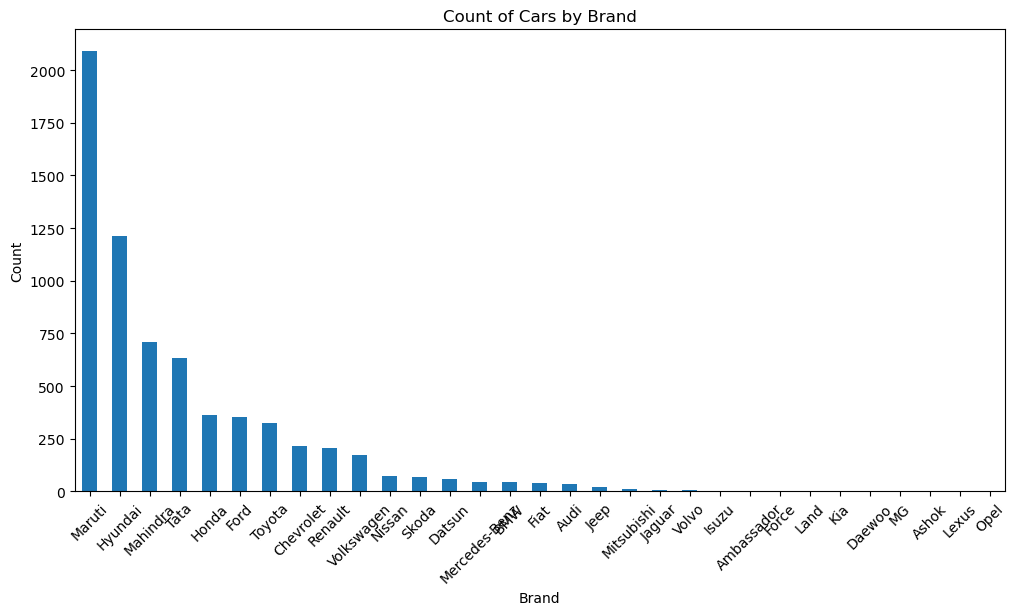

In [53]:
brand_counts = cars_data['name'].value_counts()

plt.figure(figsize=(12, 6))
brand_counts.plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Count of Cars by Brand')
plt.xticks(rotation=45)      #rotation of x-axis names for better readability 
plt.show()

### Observations -

 - Maruti has highest number of cars followed by Hyundai and Mahindra.

### Feature Engineering

In [54]:
cars_data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

Creating a heatmap

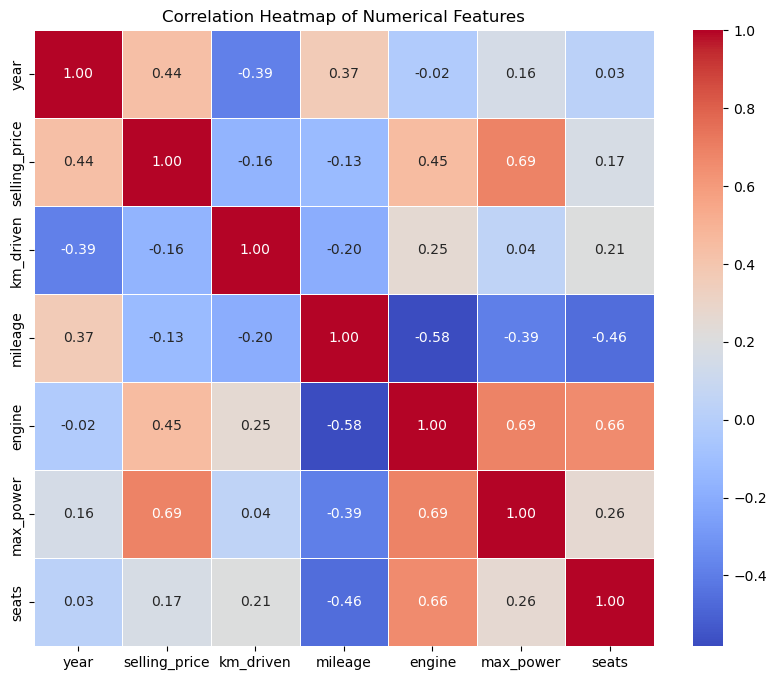

In [55]:
numerical_features = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

correlation_matrix = cars_data[numerical_features].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

 correlation values above 0.7 or below -0.7 are often considered indicative of high correlation.

All features have less than 0.7 or above -0.7 . So, we can say that there is high corelation present among the features.

<!-- while checking multicolinearity between independent columns we can see that significant correlation lies between --

- 'engine' and 'mileage' 
- 'engine' and 'max_power'
- 'engine' and 'seats' -->

### So, Encoding should be done considering above results also

### Automatic EDA using pandas profiling

In [56]:
from ydata_profiling import ProfileReport

In [57]:
report = ProfileReport(cars_data)

In [58]:
# report.to_file(output_file = 'output.html')

Applied pandas profiling to see about my cleaned dataset. 
Satisfactory results given.

## step 3 - Data Transformation 
- Encoding
- Scalling

Rather then directly transforming the data original cleaned data i will create a copy of it.

In [59]:
encode_data = cars_data.copy()

In [60]:
encode_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5
8122,Hyundai,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5


In [61]:
#Applying ordinal encoding on Transmission,fuel,seller_type and owner_type column

In [62]:
cars_data['year'].unique()

array([2014, 2006, 2010, 2007, 2017, 2001, 2011, 2013, 2005, 2009, 2016,
       2012, 2002, 2015, 2018, 2019, 2008, 2020, 1999, 2000, 2003, 2004,
       1994, 1998, 1997, 1995, 1996], dtype=int64)

In [63]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [64]:
oe_year = OrdinalEncoder(categories = [[1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]])
year_encoded = oe_year.fit_transform(encode_data[['year']])
encode_data['year'] = year_encoded

In [65]:
oe_trans = OrdinalEncoder(categories=[['Manual','Automatic']])
oe_fuel= OrdinalEncoder(categories=[['LPG','CNG','Diesel','Petrol']])
oe_seller_type = OrdinalEncoder(categories = [['Dealer','Trustmark Dealer','Individual']])
oe_owner_type = OrdinalEncoder(categories =[['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car']])

In [66]:
trans_encoded = oe_trans.fit_transform(encode_data[['transmission']]).astype('str')
fuel_encoded = oe_fuel.fit_transform(encode_data[['fuel']])
seller_type_encoded = oe_seller_type.fit_transform(encode_data[['seller_type']])
owner_type_encoded = oe_owner_type.fit_transform(encode_data[['owner']])

In [67]:
encode_data['transmission'] = trans_encoded
encode_data['fuel'] = fuel_encoded
encode_data['seller_type'] = seller_type_encoded
encode_data['owner'] = owner_type_encoded

In [68]:
encode_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,20.0,450000,145500,2.0,2.0,0.0,0.0,23.40,1248,74.00,5
1,Skoda,20.0,370000,120000,2.0,2.0,0.0,1.0,21.14,1498,103.52,5
2,Honda,12.0,158000,140000,3.0,2.0,0.0,2.0,17.70,1497,78.00,5
3,Hyundai,16.0,225000,127000,2.0,2.0,0.0,0.0,23.00,1396,90.00,5
4,Maruti,13.0,130000,120000,3.0,2.0,0.0,0.0,16.10,1298,88.20,5
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti,19.0,260000,50000,3.0,2.0,0.0,1.0,18.90,998,67.10,5
8122,Hyundai,20.0,475000,80000,2.0,2.0,0.0,1.0,22.54,1396,88.73,5
8123,Hyundai,19.0,320000,110000,3.0,2.0,0.0,0.0,18.50,1197,82.85,5
8124,Hyundai,13.0,135000,119000,2.0,2.0,0.0,3.0,16.80,1493,110.00,5


encoding is done.Now name column has categorical values and they are not in ordinal format so we'll use one hot encoding for that.

Before encoding the name column first we'll separate the dependent column 'selling_price' from our encode_data

In [69]:
encode_data_ind = encode_data.drop(columns = 'selling_price')

In [70]:
encode_data_ind = pd.get_dummies(columns = ['name'],data = encode_data_ind, sparse=False)

In [71]:
encode_data_ind

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,...,name_Mercedes-Benz,name_Mitsubishi,name_Nissan,name_Opel,name_Renault,name_Skoda,name_Tata,name_Toyota,name_Volkswagen,name_Volvo
0,20.0,145500,2.0,2.0,0.0,0.0,23.40,1248,74.00,5,...,False,False,False,False,False,False,False,False,False,False
1,20.0,120000,2.0,2.0,0.0,1.0,21.14,1498,103.52,5,...,False,False,False,False,False,True,False,False,False,False
2,12.0,140000,3.0,2.0,0.0,2.0,17.70,1497,78.00,5,...,False,False,False,False,False,False,False,False,False,False
3,16.0,127000,2.0,2.0,0.0,0.0,23.00,1396,90.00,5,...,False,False,False,False,False,False,False,False,False,False
4,13.0,120000,3.0,2.0,0.0,0.0,16.10,1298,88.20,5,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,19.0,50000,3.0,2.0,0.0,1.0,18.90,998,67.10,5,...,False,False,False,False,False,False,False,False,False,False
8122,20.0,80000,2.0,2.0,0.0,1.0,22.54,1396,88.73,5,...,False,False,False,False,False,False,False,False,False,False
8123,19.0,110000,3.0,2.0,0.0,0.0,18.50,1197,82.85,5,...,False,False,False,False,False,False,False,False,False,False
8124,13.0,119000,2.0,2.0,0.0,3.0,16.80,1493,110.00,5,...,False,False,False,False,False,False,False,False,False,False


In [72]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6716 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6716 non-null   object 
 1   year           6716 non-null   int64  
 2   selling_price  6716 non-null   int64  
 3   km_driven      6716 non-null   int64  
 4   fuel           6716 non-null   object 
 5   seller_type    6716 non-null   object 
 6   transmission   6716 non-null   object 
 7   owner          6716 non-null   object 
 8   mileage        6716 non-null   float64
 9   engine         6716 non-null   int32  
 10  max_power      6716 non-null   float64
 11  seats          6716 non-null   int32  
dtypes: float64(2), int32(2), int64(3), object(5)
memory usage: 629.6+ KB


### Encoding is done. Now it's time for scaling.

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(encode_data_ind)

In [75]:
scaled_dataset

array([[ 0.09991031,  1.22817908, -0.78726552, ..., -0.22514076,
        -0.16260526, -0.03453413],
       [ 0.09991031,  0.79377337, -0.78726552, ..., -0.22514076,
        -0.16260526, -0.03453413],
       [-1.95285492,  1.13448373,  1.06726806, ..., -0.22514076,
        -0.16260526, -0.03453413],
       ...,
       [-0.15668534,  0.62341819,  1.06726806, ..., -0.22514076,
        -0.16260526, -0.03453413],
       [-1.69625926,  0.77673785, -0.78726552, ..., -0.22514076,
        -0.16260526, -0.03453413],
       [-1.18306796,  0.79377337, -0.78726552, ..., -0.22514076,
        -0.16260526, -0.03453413]])

### Scalling is also done. Now our dataset is ready for applying models.

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x = scaled_dataset
y = cars_data['selling_price']

In [78]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6716 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6716 non-null   object 
 1   year           6716 non-null   int64  
 2   selling_price  6716 non-null   int64  
 3   km_driven      6716 non-null   int64  
 4   fuel           6716 non-null   object 
 5   seller_type    6716 non-null   object 
 6   transmission   6716 non-null   object 
 7   owner          6716 non-null   object 
 8   mileage        6716 non-null   float64
 9   engine         6716 non-null   int32  
 10  max_power      6716 non-null   float64
 11  seats          6716 non-null   int32  
dtypes: float64(2), int32(2), int64(3), object(5)
memory usage: 629.6+ KB


In [79]:
x.shape

(6716, 41)

In [80]:
y.shape

(6716,)

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 42)

### Applying Linear regression model

In [82]:
model = LinearRegression()

In [83]:
#Training model

In [84]:
model.fit(x_train,y_train)

LinearRegression()

In [85]:
from sklearn.metrics import r2_score,mean_squared_error

In [86]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

### Training r2_score

In [87]:
training_r2_score = r2_score(y_train,y_train_pred)
print(f"The Training r2 score is :{training_r2_score}")

The Training r2 score is :0.7354885977278816


### Testing r2_score

In [88]:
Testing_r2_score = r2_score(y_test,y_test_pred)
print(f"The Testing r2 score is :{Testing_r2_score}")

The Testing r2 score is :0.7515817333665245


#### Linear Regression model is giving only 76.5 % accuracy on Testing data,whuch is sufficient. We'll try with random_states

#### Let's try with 1000 random_states

In [89]:
scores = []
for i in range(1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = i)
    model = LinearRegression()
    model.fit(x_train,y_train)
    y_test_pred = model.predict(x_test)
    testing_r2_score = r2_score(y_test,y_test_pred)
    scores.append(testing_r2_score)

In [90]:
np.argmax(scores)

509

In [91]:
scores[np.argmax(scores)]

0.8182021411808529

#### At random_state = 81.82 our Linear regression model is giving highest r2_score of 81.82% . Which is still not suffucient.

### So, let's try different models using pipeline

#### Now we'll use the cleaned 'cars_data' and we'll do econding inside the pipeline. This process is better because it will encode Train and Test data separately which can stop data leakage and gives generalized performance. Using pipelines helps in deployment easily.

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error

### Now we'll create models through pipelines which is good practice than what i have above

In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [94]:
X = cars_data.drop('selling_price', axis=1)  # features
y = cars_data['selling_price']  # target variable

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [96]:
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
ordinal_encoder = OrdinalEncoder()

In [97]:
cars_data['year'].dtypes

dtype('int64')

In [98]:
cars_data['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [99]:

encoding_transformer = ColumnTransformer(
    transformers=[
        ('onehot', onehot_encoder, ['name']),
        ('ordinal', ordinal_encoder, ['year','transmission','seller_type','owner','fuel'])
    ],
    remainder='passthrough'  
)


### Here we are not doing becuase we are using Random Forest, Gradient Boosting and XGBoost models is our ensemble model 

In [100]:
# defining  the ensemble model
rf_model = RandomForestRegressor()
xgb_model = xgb.XGBRegressor()
gb_model = GradientBoostingRegressor()

In [101]:
from sklearn import set_config   #for pipeline diagram
set_config(display="diagram")

### Random Forest

In [102]:
pipeline_rf = Pipeline([
    ('encoding_transformer', encoding_transformer),
    ('rf_model', rf_model)
])

In [103]:
pipeline_rf.fit(X_train,y_train)

Pipeline(steps=[('encoding_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['name']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['year', 'transmission',
                                                   'seller_type', 'owner',
                                                   'fuel'])])),
                ('rf_model', RandomForestRegressor())])

In [104]:
y_rf_pred = pipeline_rf.predict(X_test)

In [105]:
# calculate R^2 score
r2_rf = r2_score(y_test, y_rf_pred)
print(f'R^2 Score: {r2_rf:.3f}')

R^2 Score: 0.918


### Gradient Boosting

In [106]:
pipeline_gb = Pipeline([
    ('encoding_transformer', encoding_transformer),
    ('gb_model', gb_model)
])

In [107]:
pipeline_gb.fit(X_train , y_train)

Pipeline(steps=[('encoding_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['name']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['year', 'transmission',
                                                   'seller_type', 'owner',
                                                   'fuel'])])),
                ('gb_model', GradientBoostingRegressor())])

In [108]:
y_gb_pred = pipeline_gb.predict(X_test)

In [109]:
# R^2 score
r2_gb = r2_score(y_test, y_gb_pred)
print(f'R^2 Score: {r2_gb:.3f}')

R^2 Score: 0.907


### XGBoost

In [110]:
pipeline_xgb = Pipeline([
    ('encoding_transformer', encoding_transformer),
    ('xgb_model', xgb_model)
])

In [111]:
pipeline_xgb.fit(X_train , y_train)

Pipeline(steps=[('encoding_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['name']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['year', 'transmission',
                                                   'seller_type', 'owner',
                                                   'fuel'])])),
                ('xgb_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [112]:
y_pred_xgb = pipeline_xgb.predict(X_test)

In [113]:
r2_xgb = r2_score(y_test , y_pred_xgb)
print(f"R2 score is : {r2_xgb:.3f}")

R2 score is : 0.910


XGBoost giving highest accuracy between the models.

### Now we apply Ensemble model through Pipeline

#### Stacking model as ensemble model

In [114]:
# defining  the ensemble model with some hyperparameters
rf_model = RandomForestRegressor(n_estimators=50,bootstrap=True,random_state=42)
xgb_model = xgb.XGBRegressor(n_estimators = 50 , learning_rate = 0.1 , random_state = 42)
gb_model = GradientBoostingRegressor(n_estimators=50,learning_rate=0.1,random_state=42)

In [115]:
from sklearn.ensemble import StackingRegressor
stacking_model = StackingRegressor(
    estimators=[
        ('rf', rf_model),
        ('gb', gb_model),
        ('xgb', xgb_model)
        
    ],
    final_estimator=xgb_model
)

In [116]:
pipeline = Pipeline([
    ('encoding_transformer', encoding_transformer),
    ('stacking_model', stacking_model)
])

In [117]:
# fitfing the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('encoding_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['name']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['year', 'transmission',
                                                   'seller_type', 'owner',
                                                   'fuel'])])),
                ('stacking_model',
                 StackingRegressor(estimators=[('rf',
                                                RandomForestRegressor(n_estimators=50,
                                                                      random_state=42)),...
                                                                grow_policy=None,
                                                                importance_type=None,
                                                                interaction_constraints=None,
                                                                learning_rate=0.1,
                                                                max_bin=None,
                                                                max_cat_threshold=None,
                                                                max_cat_to_onehot=None,
                                                                max_delta_step=None,
                                                                max_depth=None,
                                                                max_leaves=None,
                                                                min_child_weight=None,
                                                                missing=nan,
                                                                monotone_constraints=None,
                                                                multi_strategy=None,
                                                                n_estimators=50,
                                                                n_jobs=None,
                                                                num_parallel_tree=None,
                                                                random_state=42, ...)))])

In [118]:
# predicting on the testing data
y_pred = pipeline.predict(X_test)

In [119]:
# calculating R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.3f}')

R^2 Score: 0.925


In [120]:
# calculating adjusted R^2 score
n = len(X_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(f'Adjusted R^2 Score: {adjusted_r2:.3f}')

Adjusted R^2 Score: 0.925


### Giving the best R2 score

### Our Ensemble model is giving highest accuracy.

### Model is ready now it's time for prediction.

In [121]:
X_test.sample(10)    #taking sample from test data for input

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
4666,Hyundai,2015,70000,Petrol,Individual,Manual,Third Owner,17.19,1197,81.86,5
6836,Hyundai,2016,47552,Diesel,Individual,Manual,Second Owner,19.67,1582,126.20,5
1907,Hyundai,2011,100000,LPG,Individual,Manual,Second Owner,13.45,1086,62.10,5
7441,Honda,2017,24000,Diesel,Dealer,Manual,First Owner,21.90,1498,98.60,7
2598,Hyundai,2017,20000,Petrol,Individual,Manual,First Owner,18.90,1197,81.86,5
2406,Hyundai,2010,70000,Petrol,Individual,Manual,Second Owner,19.81,1086,68.05,5
3203,Toyota,2016,69500,Diesel,Individual,Manual,Second Owner,12.99,2494,100.60,8
5142,Maruti,2004,18000,Petrol,Individual,Manual,Second Owner,16.10,796,37.00,4
4123,Mahindra,2013,120000,Diesel,Individual,Manual,Second Owner,11.68,2498,112.00,7
349,Hyundai,2015,40000,Petrol,Dealer,Manual,First Owner,18.90,1197,82.00,5


In [122]:
# Creating input_variable with independent column values
input_variable = pd.DataFrame({
    'name': ['Tata'],  # Example value for the 'name' column
    'year': [2014],  # Example value for the 'year' column
    'km_driven': [45000],  # Example value for the 'km_driven' column
    'fuel': ['Diesel'],  # Example value for the 'fuel' column
    'seller_type': ['Individual'],  # Example value for the 'seller_type' column
    'transmission': ['Manual'],  # Example value for the 'transmission' column
    'owner': ['First Owner'],  # Example value for the 'owner' column
    'mileage': [19.09],  # Example value for the 'mileage' column
    'engine': [1405],  # Example value for the 'engine' column
    'max_power': [69.01],  # Example value for the 'max_power' column
    'seats': [5]  # Example value for the 'seats' column
})

### Prediction of selling_price by the ensemble model

In [123]:
predicted_price = pipeline.predict(input_variable)
predicted_price

array([295345.75], dtype=float32)

In [124]:
# dumping for web app using streamlit 

In [125]:
import pickle as pk

In [126]:
pk.dump(pipeline,open('ML_final.pkl','wb'))